-> Chargement des librairies et des fonctions

In [2]:
# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *

from Fonction.AllModels_ALL import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-> Chargement des données brutes

In [3]:
#Importation du jeu de donné traité obtenu avec Traitement_data.ipynb
mySample = pd.read_csv('./data_csv/balanced_concat.csv')

print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

our rating
True     500
False    500
Name: count, dtype: int64


-> Test de tout les modèles
On cherchera ensuite à ajuster les meilleurs modèles.

In [4]:
testAllModel(X_train,y_train,3)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.758 (0.065) in 1.581 s
Evaluation de  LR


KeyboardInterrupt: 

Les modèles SVM, LR et RF sont les plus performants pour la tâche de classification VRAI vs FAUX.
Pour chacun de ces trois modèles on va
- chercher les meilleurs paramètres de prétraitement
- chercher les meilleurs hyper-paramètres du modèle

-> Détermination des meilleurs paramètres de pré-traitement

In [5]:
testSVC(X_train,y_train,3)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


KeyboardInterrupt: 

-> Détermination des meilleurs hyper-paramètres du modèle SVC

In [4]:
ajustSVC(X_train, y_train,[False],[True],[None],[False]) #removedegit,getlem,stopword,lwc

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [False], 'cleaner__getlemmatisation': [True], 'tfidf__stop_words': [None], 'tfidf__lowercase': [False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 80 candidates, totalling 400 fits
réalisé en  551.295 s
Meilleur résultat : 0.817
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: False
	svm__C: 10
	svm__gamma: 0.1
	svm__kernel: 'rbf'
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
73                       True                 False    10.0       0.100   
64                       True                 False    10.0       0.001   
76                       True                 False    10.0       1.000   
72                       Tr

-> Enregistrement du modele SVC avec les meilleurs paramètres déterminés

In [1]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('svm', SVC(C=10, gamma=1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Sprint2/SentimentModel_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

NameError: name 'X_train' is not defined

-> Modèle RFC

In [4]:
testRFC(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
réalisé en  80.010 s
Meilleur résultat : 0.783
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  tfidf__lowercase  \
8                       False                  True              True   
13                      False                 False              True   
9                       False                  True              True   
10                      False                  True             False   
11                      False                  True             False   

   tfidf__stop_words  accuracy  

In [6]:
ajustRFC(X_train, y_train,[True,False],[False],['english',None],[True]) #removedigit,getlem,stopword,lwc

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
réalisé en  580.455 s
Meilleur résultat : 0.791
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 15
	rfc__n_estimators: 500
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
9                       False                  True              25   
75                      False                 False              30   
81                      False             

Sauvegarde du modèle dans  ./Sprint2/RandomForestClassifier_Sprint2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('rfc',
                 RandomForestClassifier(max_depth=25, min_samples_split=15,
                                        n_estimators=500))])
Accuracy : 0.820
Classification Report
              precision    recall  f1-score   support

       False    0.82353   0.82353   0.82353        51
        True    0.81633   0.81633   0.81633        49

    accuracy                        0.82000       100
   macro avg    0.81993   0.81993   0.81993       100
weighted avg    0.82000   0.82000   0.82000       100



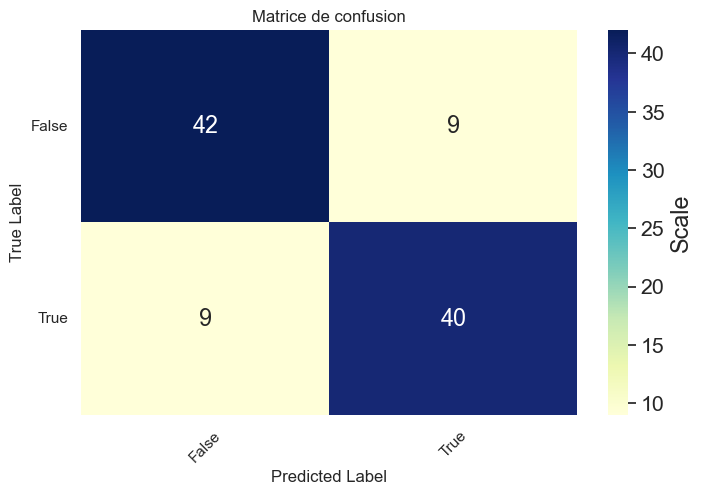

In [9]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=1, min_samples_split=15, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Sprint2/RandomForestClassifier_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Modèle LR

In [3]:
testLR(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
réalisé en  86.228 s
Meilleur résultat : 0.786
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  tfidf__lowercase  \
10                      False                  True             False   
14                      False                 False             False   
2                        True                  True             False   
6                        True                 False             False   
8                       False                  True              True   

   tfidf__stop_words  accuracy  

In [4]:
ajustLR(X_train, y_train,[True],[False],['english'],[False]) #removedigit,getlem,stopword,lwc

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True], 'cleaner__getlemmatisation': [False], 'tfidf__stop_words': ['english'], 'tfidf__lowercase': [False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
réalisé en  52.468 s
Meilleur résultat : 0.824
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	lr__C: 100
	lr__penalty: 'l2'
	lr__solver: 'liblinear'
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
    cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
2                      False                  True  100.0          l2   
0                      False                  True  100.0          l2   
1                      False                  True  100.0          l2   
3                      False          

Sauvegarde du modèle dans  ./Sprint2/LogisticRegression_Sprint2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('lr', LogisticRegression(C=100, solver='liblinear'))])
Accuracy : 0.850
Classification Report
              precision    recall  f1-score   support

       False    0.84615   0.86275   0.85437        51
        True    0.85417   0.83673   0.84536        49

    accuracy                        0.85000       100
   macro avg    0.85016   0.84974   0.84986       100
weighted avg    0.85008   0.85000   0.84995       100



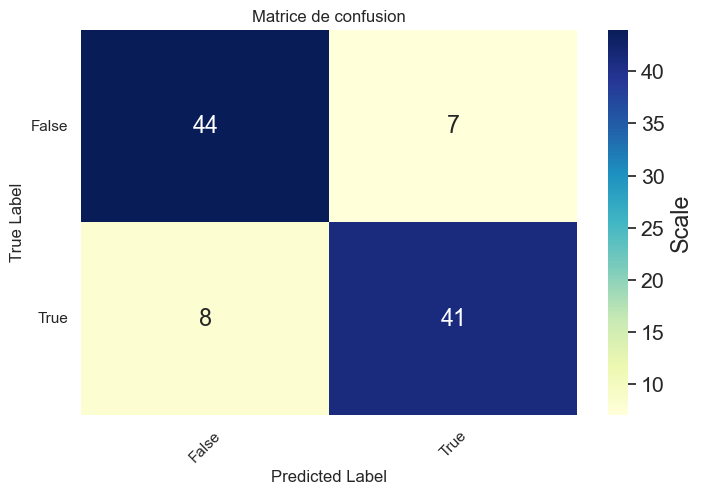

In [6]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear'))
])
pipeline.fit(train_title,train_note)
filename='./Sprint2/LogisticRegression_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)